In [4]:
import pandas as pd
loc43= pd.read_csv('43-17.01.29-02.04.csv')
print(loc43)

     Unnamed: 0   Unnamed: 1                  Unnamed: 2 Unnamed: 3  \
0           NaN          NaN                         NaN        NaN   
1           NaN     SITE NO:  43 - Melville Drive 2 Spur        NaN   
2           NaN        Date:                    29/01/17        NaN   
3           NaN   Direction:                                    NaN   
4           NaN          NaN                         NaN        NaN   
5           NaN         Hour                         P/C    P/C Kph   
6           NaN  00.00-00.59                           3          8   
7           NaN  01.00-01.59                           3         14   
8           NaN  02.00-02.59                           2          9   
9           NaN  03.00-03.59                           2         15   
10          NaN  04.00-04.59                           1         10   
11          NaN  05.00-05.59                           0          0   
12          NaN  06.00-06.59                           0          0   
13    

In [5]:
loc43 = loc43.rename(columns={'Unnamed: 1': 'Hour', 'Unnamed: 2': 'P/C', 'Unnamed: 3': 'P/C Kph', 'DAILY FLOW BY HOUR': 'Ped', 'Unnamed: 5': 'Total'})
print('Melville Drive 2 Spur - DAILY FLOW BY HOUR')
loc43.drop(loc43.index[[0,1,2,3,4,5]], inplace=True)
loc43.drop(loc43.columns[[0,5]], axis=1, inplace=True)
loc43.index = loc43.index - 6
newcols = {
    'P/C': 'Bike Counts', 
    'P/C Kph': 'Bike Speed', 
    'Ped': 'Pedestrian Counts'
}
loc43.rename(columns=newcols, inplace=True)
loc43

Melville Drive 2 Spur - DAILY FLOW BY HOUR


,Hour,Bike Counts,Bike Speed,Pedestrian Counts
0,00.00-00.59,3,8,9
1,01.00-01.59,3,14,5
2,02.00-02.59,2,9,3
3,03.00-03.59,2,15,2
4,04.00-04.59,1,10,1
5,05.00-05.59,0,0,2
6,06.00-06.59,0,0,6
7,07.00-07.59,1,13,9
8,08.00-08.59,6,11,28
9,09.00-09.59,3,13,55


In [6]:
loc43['Hourstarts'] = loc43.Hour.str.split('-').str.get(0)
loc43['Hourends'] = loc43.Hour.str.split('-').str.get(1)
loc43.drop(loc43.columns[0], axis=1, inplace=True)

In [8]:
loc43.to_csv('Loc43.csv')
loc43 = loc43.dropna(how='all')
loc43 = loc43[loc43.Hourstarts != "Direction:"]
loc43 = loc43[loc43.Hourstarts != "Total"]
loc43 = loc43[loc43.Hourstarts != "Hour"]
loc43 = loc43[loc43.Hourstarts != "Date:"]

In [9]:
pd.options.mode.chained_assignment = None

In [10]:
loc43[['Bike Counts','Hourstarts','Hourends','Bike Speed','Pedestrian Counts']] = loc43[['Bike Counts','Hourstarts','Hourends','Bike Speed','Pedestrian Counts']].apply(pd.to_numeric)
#

In [11]:
loc43day1 = loc43.iloc[0:24]
loc43day2 = loc43.iloc[24:48]
loc43day3 = loc43.iloc[48:72]
loc43day4 = loc43.iloc[72:96]
loc43day5 = loc43.iloc[96:120]
loc43day6 = loc43.iloc[120:144]
loc43day7 = loc43.iloc[144:168]
#my data is divided into 7 clean sets

In [12]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

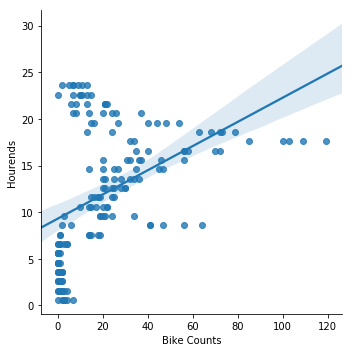

In [13]:
sns.lmplot(x='Bike Counts',y='Hourends',data=loc43)

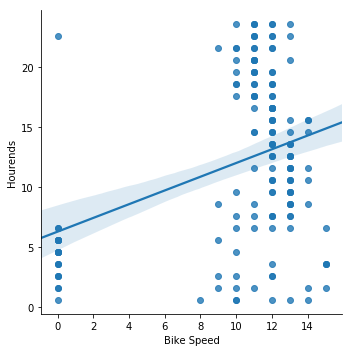

In [14]:
sns.lmplot(x='Bike Speed',y='Hourends',data=loc43)

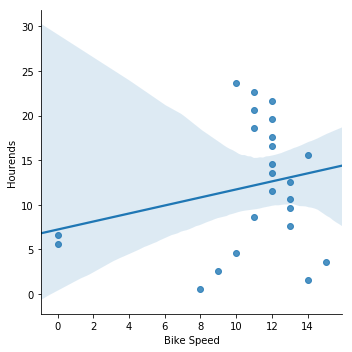

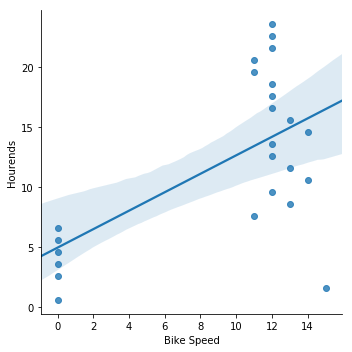

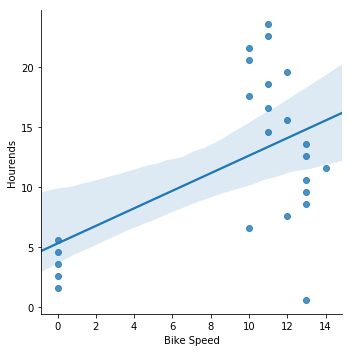

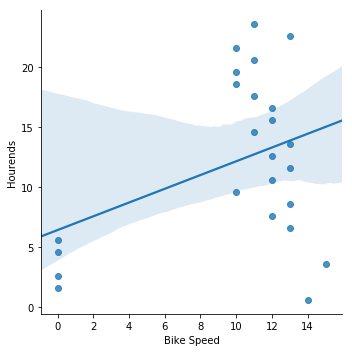

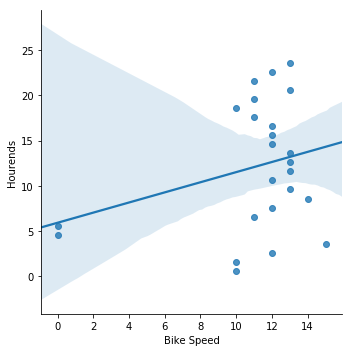

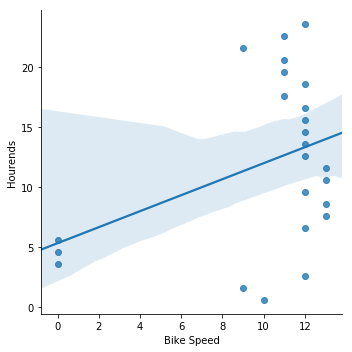

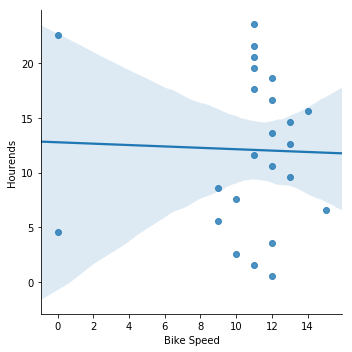

In [29]:
sns.lmplot(x='Bike Speed',y='Hourends',data=loc43day1)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc43day2)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc43day3)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc43day4)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc43day5)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc43day6)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc43day7)

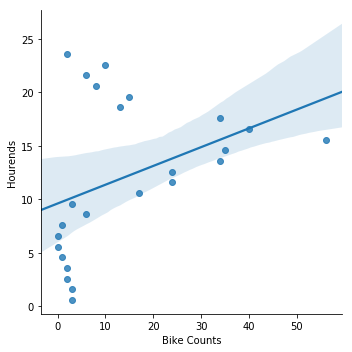

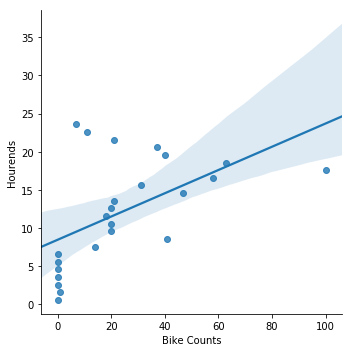

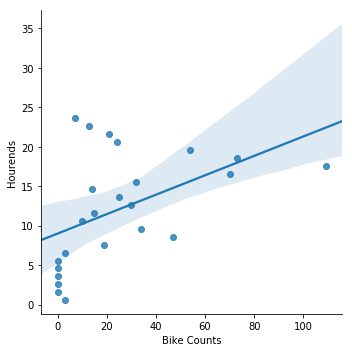

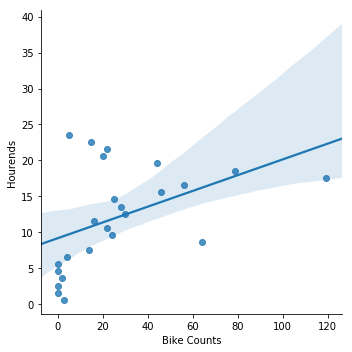

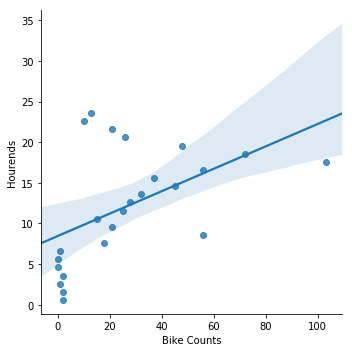

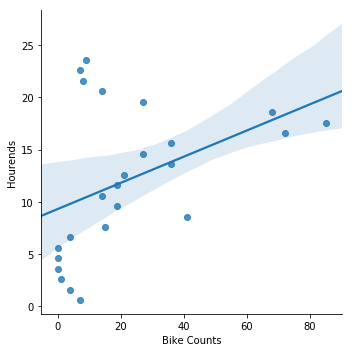

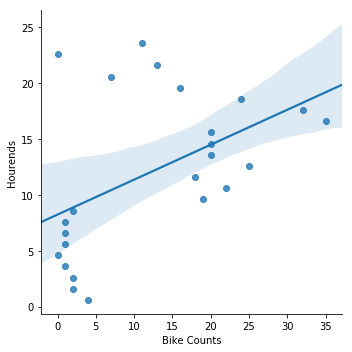

In [30]:
sns.lmplot(x='Bike Counts',y='Hourends',data=loc43day1)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc43day2)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc43day3)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc43day4)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc43day5)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc43day6)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc43day7)